Objective: To estimate the modulus of elasticity and density properties from the frequency response.

Considering an acrylic duct, with the following geometries:
* length = 1.41 m 
* Mass = 339.78 g = 0.33978 Kg
* internal diameter of 0.019 m
* external diameter of 0.0254 m

The cross-sectional area ($A$) is given by:
$$
A = A_{external} + A_{internal} = \pi \frac{(d_{external}^2-d_{internal}^2)}{4}    [m^2]
$$

The volume of the pipeline ($V$) is given by:
$$
V = (\pi R_{external}^2 - \pi r_{internal}^2)L           [m^3]
$$

Flexural stiffness ($I$) is given by:
$$
I = \frac{\pi}{64}(d_{external}^4-d_{internal}^4)
$$

The mass density ($\rho$) is given by:
$$
\rho = \frac{m}{V}             [kg/m^3]
$$

The modulus of elasticity ($E$) is given by:
$$
E = \frac{f_{n}^{2} 4 \pi L^4 \rho A}{\gamma^4 I} [Pa]
$$

where $f_n$ is the natural frequency of the structure $n=1,...,N$ and $\gamma$ is its amplitude.

mass density calculation:

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt 

L = 1.41       # length [m]
di = 0.019     # internal diameter [m]
ri = di/2      # internal radius [m]
de = 0.0254    # external diameter [m]
re = de/2      # external radius [m]
h =  (de-de)/2 # wall thickness [m]
m = 0.33978    # mass [kg]
g = 9.8        # gravity acceleration [m/s^2]

# Duct cross-sectional area
A =  math.pi*(de**2 -di**2)/4

# Duct internal area 
Ai = math.pi*(di**2)/4

# total area
At = Ai + A

# flexural rigidity
I = math.pi*((de**4)-(di**4))/64

# duct volume 
V = (math.pi*re**2 - math.pi*ri**2)*L

# specific mass of the duct
rho_p = m/V
print('mass density: %.3f' %rho_p)


mass density: 1079.757


Experimental data collected in impact testing:

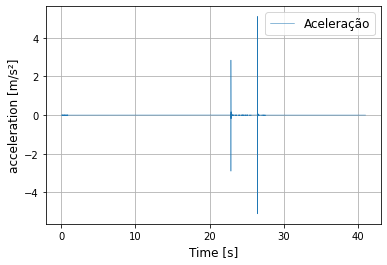

In [25]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

#load .txt file
for kk in glob.glob('Test.txt'): 
    data_teorico = pd.read_table(kk, delim_whitespace = True)
    data_teorico.columns = ['Time','Acc']
    time = data_teorico['Time'].values
    data  = data_teorico['Acc'].values

N = (len(time))       # length
dt = time[1]-time[0]  # period
fs = round(1/dt)      # sampling frequency

plt.figure()
plt.plot(time, data, label = 'Aceleração', lw=0.5)
plt.ylabel('acceleration [m/s²]', color='black',fontsize=12)
plt.xlabel('Time [s]',fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.grid()


select the region of interest:

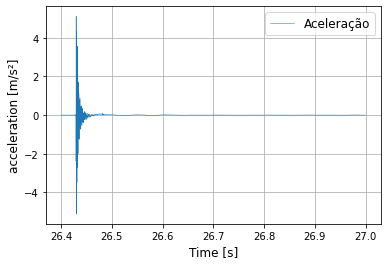

In [32]:
# function that returns the index of the vector with the chosen value
def find_nearest(array, value):
    import numpy as np
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

idx1 = find_nearest(time, 26.4)
idx2 = find_nearest(time, 27)

data_cut = data[idx1:idx2]
time_cut = time[idx1:idx2]

plt.figure()
plt.plot(time_cut, data_cut, label = 'Aceleração', lw=0.5)
plt.ylabel('acceleration [m/s²]', color='black',fontsize=12)
plt.xlabel('Time [s]',fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.grid()

calculate the fourier transform:

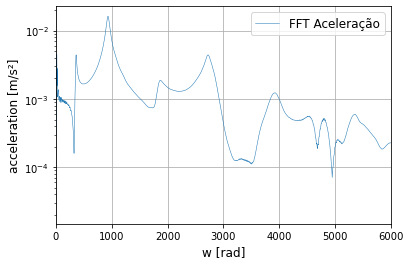

In [34]:
# function that computes the fourier transform
def Fourier_trans(sinal):
    FFT_sinal = np.fft.fft(sinal)
    n = FFT_sinal.size
    T = 1/fs
    freq = np.fft.fftfreq(n, d=T)
    FFT = np.abs(FFT_sinal)[1:int(n/2)]/n 
    freq = freq[1:int(n/2)]
    return FFT, freq

FFT, freq = Fourier_trans(data_cut)

plt.figure()
plt.semilogy(freq, FFT, label = 'FFT Aceleração', lw=0.5)
plt.ylabel('acceleration [m/s²]', color='black',fontsize=12)
plt.xlabel('w [rad]',fontsize=12)
plt.xlim(0, 6000)
plt.legend(loc="best", fontsize=12)
plt.grid()

from the experimental data we have the following frequency and amplitude information: f = [355, 935, 1863, 2718] gama = [4.7, 7.8, 10.99, 14.13] then we can calculate the modulus of elasticity:

In [26]:
f = [355, 935, 1863, 2718]
gama = [4.7, 7.8, 10.99, 14.13]
ME = np.zeros(len(f))

for i in range (0, len(f)):
    ME[i] = (f[i]*4*(math.pi**2)*(L**4)*rho_p*A)/(I*gama[i]**4)
ME = ME.mean()
print('modulus of elasticity: %.10f' %ME)

modulus of elasticity: 787702281.6195549965
